# Analysis Of MI vs DC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [4]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [5]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [8]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

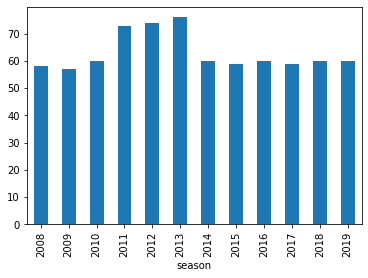

In [10]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [11]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [12]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

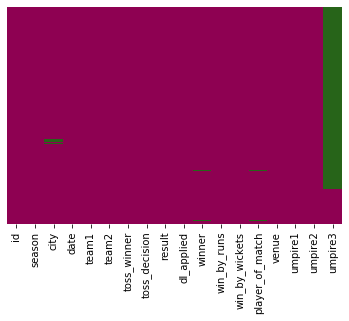

In [13]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [14]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [15]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

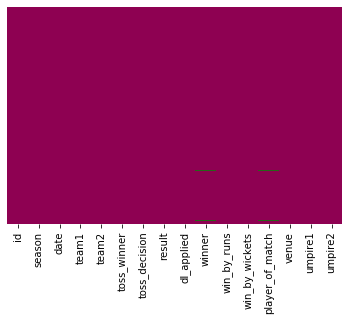

In [16]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Delhi capitals(DC) and Sunrises Hyderabad(SRH).so we only want information between the matches that had take place between them.

#  Delhi Dardevils Changed  to Delhi capitals in 2019 So need to change the title to Delhi Capitals

In [17]:
Matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [18]:
Matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [19]:
MI_DC1=Matches.loc[(Matches['team1']=='Delhi Capitals')&(Matches['team2'] =='Mumbai Indians')]
MI_DC1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
237,238,2011,Delhi,2011-04-10,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
341,342,2012,Delhi,2012-04-27,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,V Sehwag,Feroz Shah Kotla,Aleem Dar,BNJ Oxenford,NaN
538,539,2015,Delhi,2015-04-23,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,SS Iyer,Feroz Shah Kotla,SD Fry,CK Nandan,NaN
555,556,2015,Mumbai,2015-05-05,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,5,Harbhajan Singh,Wankhede Stadium,HDPK Dharmasena,CB Gaffaney,NaN
592,593,2016,Delhi,2016-04-23,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,10,0,SV Samson,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN
690,7948,2018,Delhi,20/05/18,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Delhi Capitals,11,0,A Mishra,Feroz Shah Kotla,Kumar Dharmasena,O Nandan,Vineet Kulkarni
698,11139,2019,Mumbai,24/03/19,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan


In [20]:
MI_DC2=Matches.loc[(Matches['team2']=='Delhi Capitals')&(Matches['team1'] =='Mumbai Indians')]

In [21]:
MI_DC2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN
169,170,2009,Centurion,2009-05-21,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,V Sehwag,SuperSport Park,IL Howell,S Ravi,NaN
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN
220,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,39,0,KA Pollard,Brabourne Stadium,S Asnani,DJ Harper,NaN
281,282,2011,Mumbai,2011-05-07,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,32,0,AT Rayudu,Wankhede Stadium,K Hariharan,SJA Taufel,NaN
326,327,2012,Mumbai,2012-04-16,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,S Nadeem,Wankhede Stadium,BF Bowden,SK Tarapore,NaN


In [22]:
MI_DC=MI_DC1.append(MI_DC2)

In [23]:
MI_DC

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
237,238,2011,Delhi,2011-04-10,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
341,342,2012,Delhi,2012-04-27,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,V Sehwag,Feroz Shah Kotla,Aleem Dar,BNJ Oxenford,NaN
538,539,2015,Delhi,2015-04-23,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,SS Iyer,Feroz Shah Kotla,SD Fry,CK Nandan,NaN
555,556,2015,Mumbai,2015-05-05,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Mumbai Indians,0,5,Harbhajan Singh,Wankhede Stadium,HDPK Dharmasena,CB Gaffaney,NaN
592,593,2016,Delhi,2016-04-23,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,10,0,SV Samson,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN
690,7948,2018,Delhi,20/05/18,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,Delhi Capitals,11,0,A Mishra,Feroz Shah Kotla,Kumar Dharmasena,O Nandan,Vineet Kulkarni
698,11139,2019,Mumbai,24/03/19,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN


In [24]:
MI_DC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 237 to 729
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               24 non-null     int64 
 1   season           24 non-null     int64 
 2   city             24 non-null     object
 3   date             24 non-null     object
 4   team1            24 non-null     object
 5   team2            24 non-null     object
 6   toss_winner      24 non-null     object
 7   toss_decision    24 non-null     object
 8   result           24 non-null     object
 9   dl_applied       24 non-null     int64 
 10  winner           24 non-null     object
 11  win_by_runs      24 non-null     int64 
 12  win_by_wickets   24 non-null     int64 
 13  player_of_match  24 non-null     object
 14  venue            24 non-null     object
 15  umpire1          24 non-null     object
 16  umpire2          24 non-null     object
 17  umpire3          4 non-null      o

# # Complete details of matches that takes placed between MI and DC

In [25]:
MI_DC.describe

<bound method NDFrame.describe of         id  season           city        date           team1           team2  \
237    238    2011          Delhi  2011-04-10  Delhi Capitals  Mumbai Indians   
341    342    2012          Delhi  2012-04-27  Delhi Capitals  Mumbai Indians   
538    539    2015          Delhi  2015-04-23  Delhi Capitals  Mumbai Indians   
555    556    2015         Mumbai  2015-05-05  Delhi Capitals  Mumbai Indians   
592    593    2016          Delhi  2016-04-23  Delhi Capitals  Mumbai Indians   
690   7948    2018          Delhi    20/05/18  Delhi Capitals  Mumbai Indians   
698  11139    2019         Mumbai    24/03/19  Delhi Capitals  Mumbai Indians   
23      24    2017         Mumbai  2017-04-22  Mumbai Indians  Delhi Capitals   
43      44    2017          Delhi  2017-05-06  Mumbai Indians  Delhi Capitals   
81      82    2008         Mumbai  2008-05-04  Mumbai Indians  Delhi Capitals   
108    109    2008          Delhi  2008-05-24  Mumbai Indians  Delhi Capita

In [26]:
print("No of matches that takes place between KXIP and DC:",len(MI_DC))

No of matches that takes place between KXIP and DC: 24


#  Below plot gives the details of the match that takes place between DC and MI

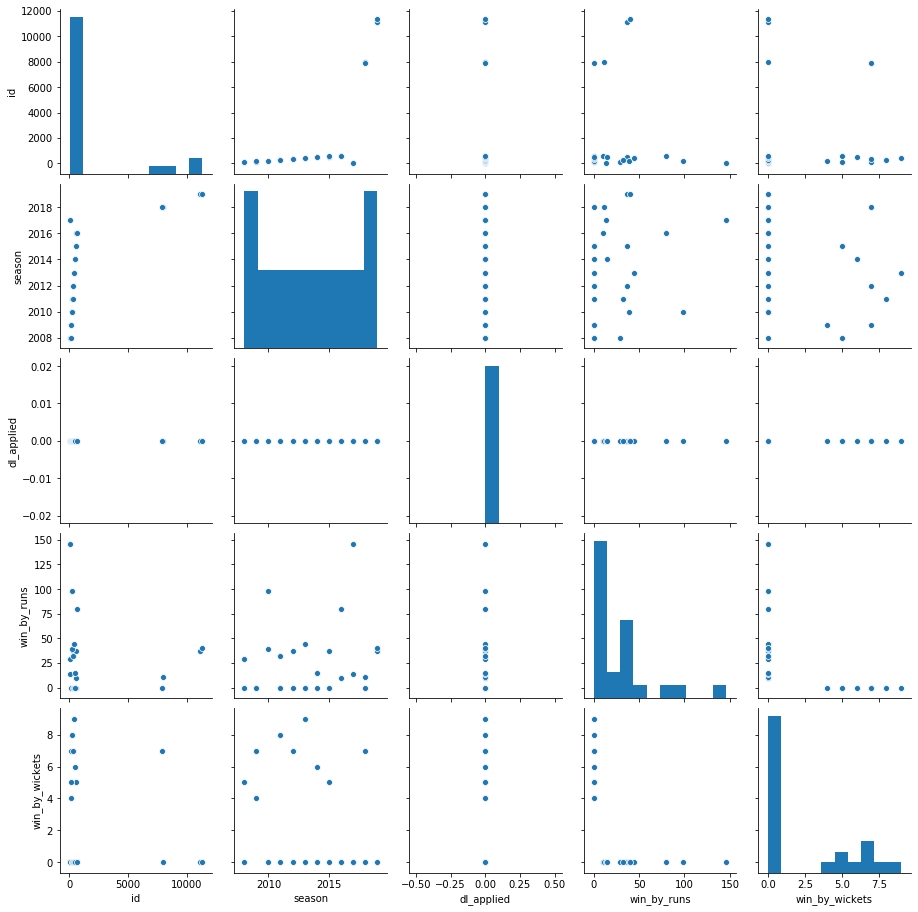

In [28]:
sns.pairplot(MI_DC)

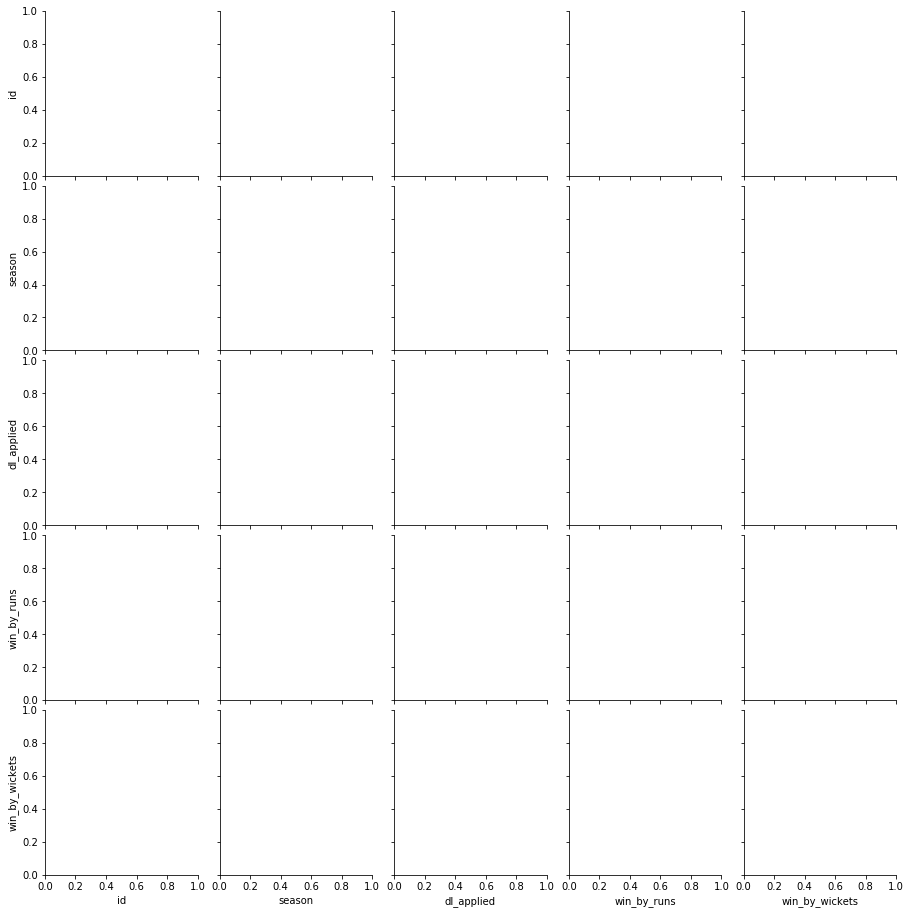

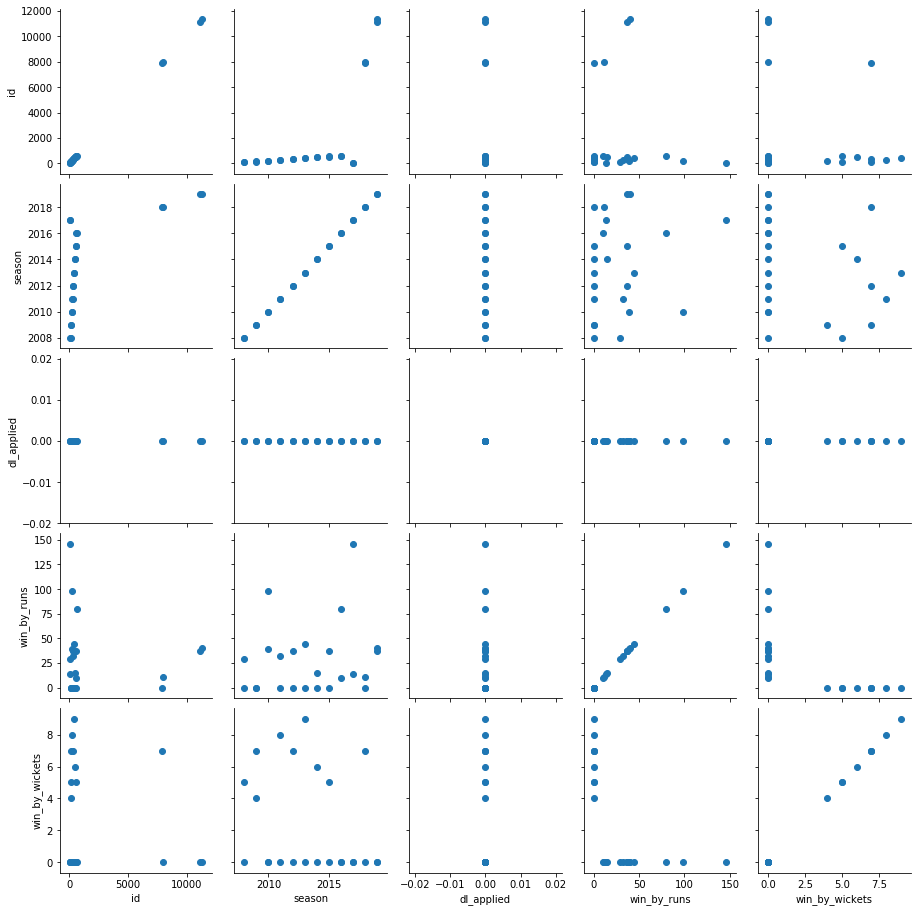

In [29]:
sns.PairGrid(MI_DC)
g=sns.PairGrid(MI_DC)
g.map(plt.scatter)

#  It looks like  DC win the Toss 9 Times and 6 Times MI win the Toss

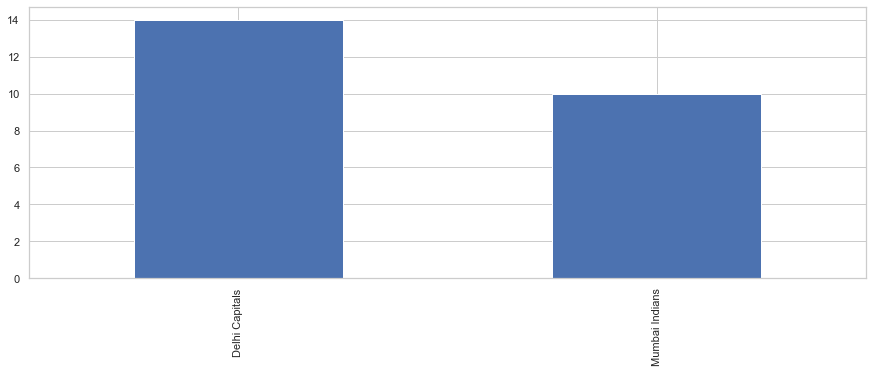

In [38]:
sns.set()
sns.set_style('whitegrid')
MI_DC['toss_winner'].value_counts().plot(kind='bar')

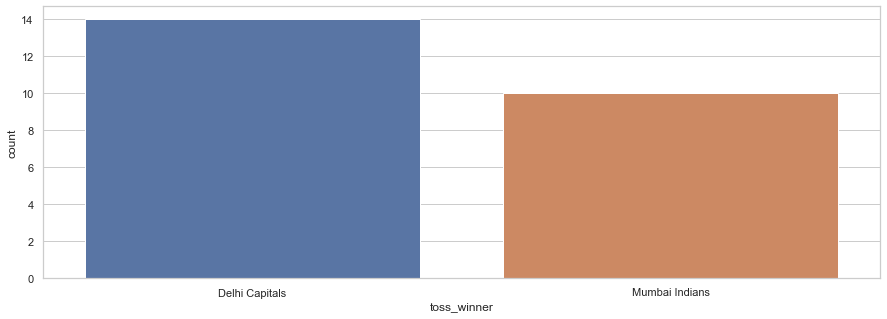

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='toss_winner',data=MI_DC)

# DC went on to win the match 4 time by  batting first and 8  times by Batting second against MI .so total it is (DC=win-12,loss-12)whereas for MI they win the match 5 times by batting first and win 7 times by batting second against DC.so it is (MI=win-12,loss=12)

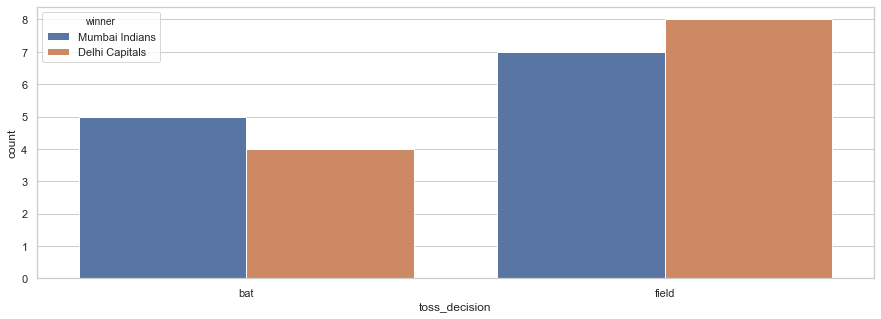

In [41]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='toss_decision',hue="winner",data=MI_DC)

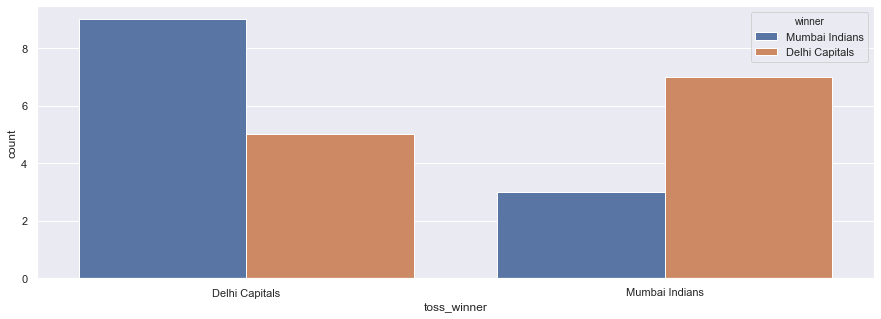

In [42]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=MI_DC)

In [43]:
print("No of times toss win by both teams:")
MI_DC['toss_winner'].value_counts()

No of times toss win by both teams:


Delhi Capitals    14
Mumbai Indians    10
Name: toss_winner, dtype: int64

In [44]:
print("SRH win 9 times and Delhi win 6 times from 15 matches")

SRH win 9 times and Delhi win 6 times from 15 matches


# Both  teams win 12 times each

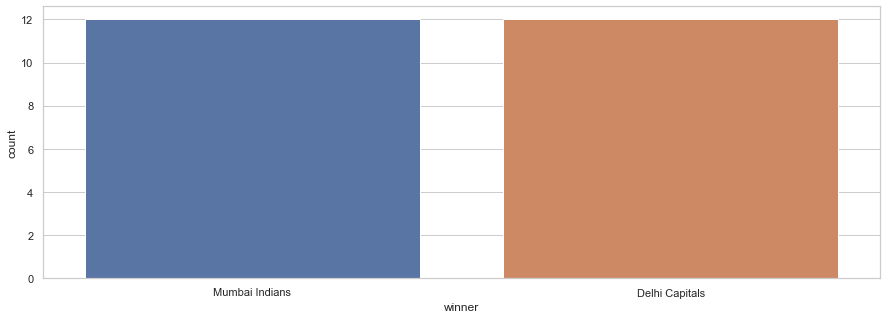

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=MI_DC)

# correlation between Columns in Matches Dataset

In [48]:
MI_DC.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.663646,NaN,-0.043953,-0.133313
season,0.663646,1.000000,NaN,0.178048,-0.259801
dl_applied,NaN,NaN,NaN,NaN,NaN
win_by_runs,-0.043953,0.178048,NaN,1.000000,-0.582562
win_by_wickets,-0.133313,-0.259801,NaN,-0.582562,1.000000


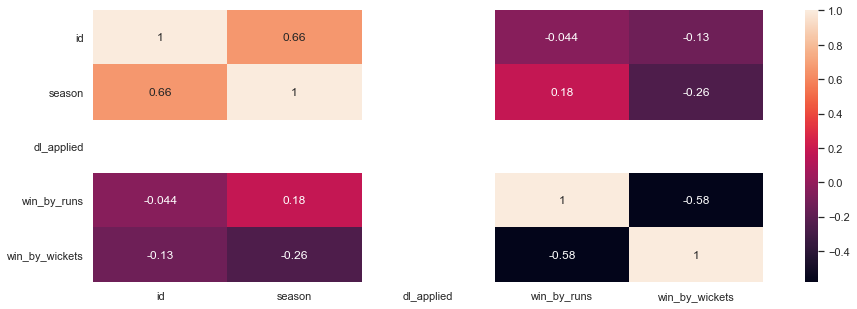

In [49]:
sns.heatmap(MI_DC.corr(),yticklabels=True,annot=True)

In [50]:
MI_DC['winner']=pd.get_dummies(MI_DC['winner'])

In [51]:
MI_DC.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
237,238,2011,Delhi,2011-04-10,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,0,0,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
341,342,2012,Delhi,2012-04-27,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,1,37,0,V Sehwag,Feroz Shah Kotla,Aleem Dar,BNJ Oxenford,NaN


# Using Sweetviz we can get details about the Matches

In [52]:
import sweetviz 
my_report=sweetviz.analyze([MI_DC,'MI_DC'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [53]:
my_report.show_html("Report1.html")

#  Now let get into the Deliveries Dataset

In [51]:
Deliveries=pd.read_csv("deliveries.csv")

In [52]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [53]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [54]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Need To replace Delhi Dardevils with Delhi Capitals

In [55]:
Deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [56]:
Deliveries.tail(30)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179048,11415,2,Chennai Super Kings,Mumbai Indians,16,1,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179049,11415,2,Chennai Super Kings,Mumbai Indians,16,2,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179050,11415,2,Chennai Super Kings,Mumbai Indians,16,3,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179051,11415,2,Chennai Super Kings,Mumbai Indians,16,4,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179052,11415,2,Chennai Super Kings,Mumbai Indians,16,5,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179053,11415,2,Chennai Super Kings,Mumbai Indians,16,6,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179054,11415,2,Chennai Super Kings,Mumbai Indians,17,1,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179055,11415,2,Chennai Super Kings,Mumbai Indians,17,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179056,11415,2,Chennai Super Kings,Mumbai Indians,17,3,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179057,11415,2,Chennai Super Kings,Mumbai Indians,17,4,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Filtering the match details that only takes place between Delhi Capitals and  Sunrises Hyderabad

In [57]:
Delhi_Mumbai1=Deliveries.loc[(Deliveries['batting_team' ] =='Mumbai Indians' ) & (Deliveries['bowling_team'] == 'Delhi Capitals')]

In [58]:
Delhi_Mumbai1         

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Capitals,1,1,PA Patel,JC Buttler,K Rabada,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Capitals,1,2,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Capitals,1,4,PA Patel,JC Buttler,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Capitals,1,5,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172877,11325,1,Mumbai Indians,Delhi Capitals,20,4,HH Pandya,KH Pandya,K Rabada,0,...,0,0,0,0,0,0,0,HH Pandya,caught,RR Pant
172878,11325,1,Mumbai Indians,Delhi Capitals,20,5,KH Pandya,KA Pollard,K Rabada,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
172879,11325,1,Mumbai Indians,Delhi Capitals,20,6,KH Pandya,KA Pollard,K Rabada,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
172880,11325,1,Mumbai Indians,Delhi Capitals,20,7,KH Pandya,KA Pollard,K Rabada,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [59]:
Delhi_Mumbai2=Deliveries.loc[(Deliveries['bowling_team' ] =='Mumbai Indians') & (Deliveries['batting_team'] == 'Delhi Capitals')]

In [60]:
Delhi_Mumbai2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5639,24,2,Delhi Capitals,Mumbai Indians,1,1,SV Samson,AP Tare,MG Johnson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5640,24,2,Delhi Capitals,Mumbai Indians,1,2,SV Samson,AP Tare,MG Johnson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5641,24,2,Delhi Capitals,Mumbai Indians,1,3,SV Samson,AP Tare,MG Johnson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5642,24,2,Delhi Capitals,Mumbai Indians,1,4,AP Tare,SV Samson,MG Johnson,0,...,0,0,0,0,0,0,0,AP Tare,run out,HH Pandya
5643,24,2,Delhi Capitals,Mumbai Indians,1,5,SV Samson,KK Nair,MG Johnson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173000,11325,2,Delhi Capitals,Mumbai Indians,20,2,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173001,11325,2,Delhi Capitals,Mumbai Indians,20,3,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173002,11325,2,Delhi Capitals,Mumbai Indians,20,4,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,0,0,0,K Rabada,caught,KA Pollard
173003,11325,2,Delhi Capitals,Mumbai Indians,20,5,A Mishra,I Sharma,HH Pandya,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [61]:
Delhi_Mumbai=Delhi_Mumbai1.append(Delhi_Mumbai2)

# Complete Details Of Delhi vs Mumbai

In [62]:
Delhi_Mumbai

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Capitals,1,1,PA Patel,JC Buttler,K Rabada,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Capitals,1,2,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Capitals,1,4,PA Patel,JC Buttler,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Capitals,1,5,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173000,11325,2,Delhi Capitals,Mumbai Indians,20,2,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173001,11325,2,Delhi Capitals,Mumbai Indians,20,3,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173002,11325,2,Delhi Capitals,Mumbai Indians,20,4,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,0,0,0,K Rabada,caught,KA Pollard
173003,11325,2,Delhi Capitals,Mumbai Indians,20,5,A Mishra,I Sharma,HH Pandya,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# using Match_id we can summarize that 24 matches were played between MI and DC

In [63]:
Delhi_Mumbai['match_id'].value_counts()

539      255
24       252
593      251
282      250
342      249
390      248
150      247
11325    247
109      247
221      247
7948     247
7902     246
11139    246
556      244
508      243
170      241
473      238
82       238
623      237
183      230
408      228
238      218
327      215
44       211
Name: match_id, dtype: int64

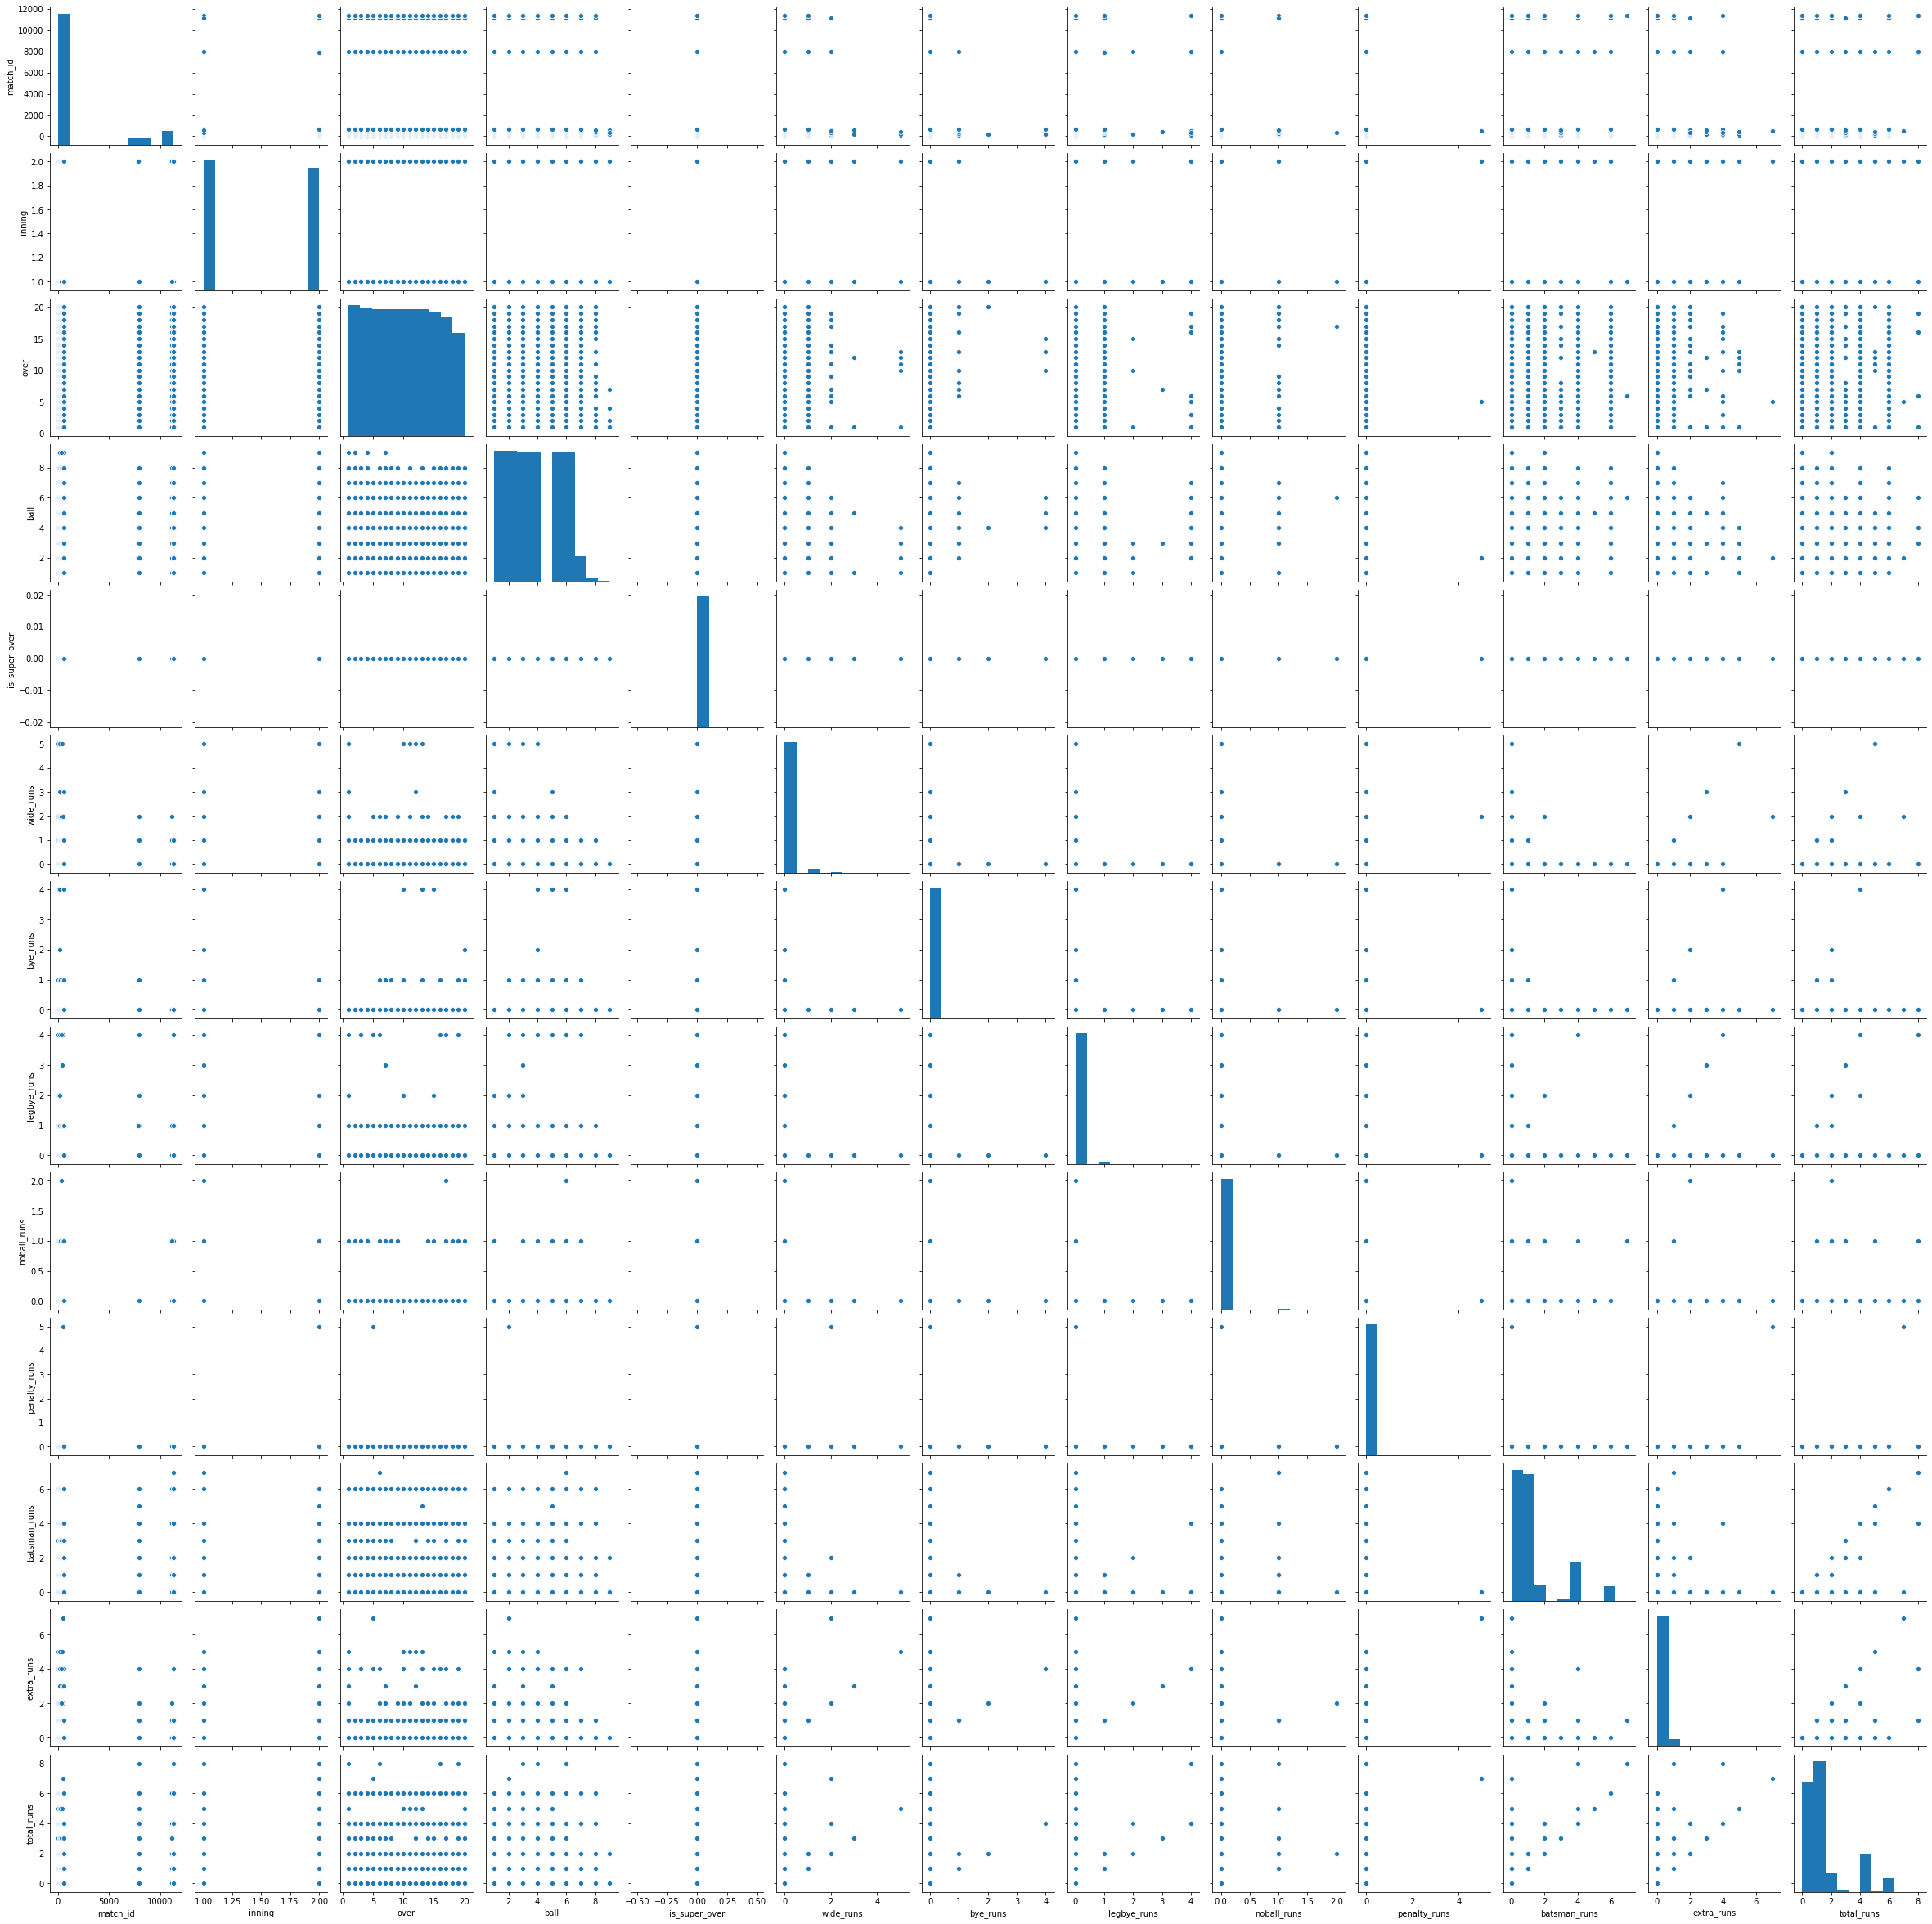

In [64]:
sns.pairplot(Delhi_Mumbai)

# It's difficult to interpret covariance.Let's try correlation

In [65]:
Delhi_Mumbai.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.264822e+07,20.702227,490.712800,-21.829287,0.0,-12.571278,-6.032663,3.081112,-2.181721,-1.232967,299.612288,-18.937518,280.674770
inning,2.070223e+01,0.249764,-0.110497,-0.011022,0.0,-0.001162,-0.000791,-0.003099,-0.000785,0.000447,-0.029802,-0.005389,-0.035190
over,4.907128e+02,-0.110497,32.201738,-0.053615,0.0,-0.004740,0.014088,-0.011674,0.013493,-0.004518,0.699100,0.006650,0.705750
ball,-2.182929e+01,-0.011022,-0.053615,3.296997,0.0,-0.001209,0.003938,-0.003257,0.002509,-0.001408,0.070640,0.000574,0.071214
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wide_runs,-1.257128e+01,-0.001162,-0.004740,-0.001209,0.0,0.062015,-0.000177,-0.000858,-0.000191,0.001698,-0.042419,0.062488,0.020069
bye_runs,-6.032663e+00,-0.000791,0.014088,0.003938,0.0,-0.000177,0.011064,-0.000098,-0.000022,-0.000004,-0.005400,0.010763,0.005363
legbye_runs,3.081112e+00,-0.003099,-0.011674,-0.003257,0.0,-0.000858,-0.000098,0.040397,-0.000106,-0.000019,-0.016269,0.039316,0.023048
noball_runs,-2.181721e+00,-0.000785,0.013493,0.002509,0.0,-0.000191,-0.000022,-0.000106,0.005172,-0.000004,-0.001325,0.004850,0.003524
penalty_runs,-1.232967e+00,0.000447,-0.004518,-0.001408,0.0,0.001698,-0.000004,-0.000019,-0.000004,0.004329,-0.001072,0.006000,0.004928


In [66]:
Delhi_Mumbai.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.011648,0.024315,-0.003380,NaN,-0.014194,-0.016127,0.004310,-0.008530,-0.005269,0.052188,-0.015157,0.048979
inning,0.011648,1.000000,-0.038963,-0.012147,NaN,-0.009333,-0.015042,-0.030854,-0.021838,0.013608,-0.036940,-0.030694,-0.043700
over,0.024315,-0.038963,1.000000,-0.005203,NaN,-0.003354,0.023603,-0.010235,0.033063,-0.012101,0.076318,0.003336,0.077186
ball,-0.003380,-0.012147,-0.005203,1.000000,NaN,-0.002673,0.020619,-0.008925,0.019214,-0.011782,0.024100,0.000899,0.024341
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,-0.014194,-0.009333,-0.003354,-0.002673,NaN,1.000000,-0.006757,-0.017137,-0.010643,0.103624,-0.105522,0.714265,0.050014
bye_runs,-0.016127,-0.015042,0.023603,0.020619,NaN,-0.006757,1.000000,-0.004647,-0.002886,-0.000563,-0.031800,0.291266,0.031645
legbye_runs,0.004310,-0.030854,-0.010235,-0.008925,NaN,-0.017137,-0.004647,1.000000,-0.007320,-0.001429,-0.050142,0.556814,0.071166
noball_runs,-0.008530,-0.021838,0.033063,0.019214,NaN,-0.010643,-0.002886,-0.007320,1.000000,-0.000887,-0.011415,0.191953,0.030415
penalty_runs,-0.005269,0.013608,-0.012101,-0.011782,NaN,0.103624,-0.000563,-0.001429,-0.000887,1.000000,-0.010090,0.259574,0.046486


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

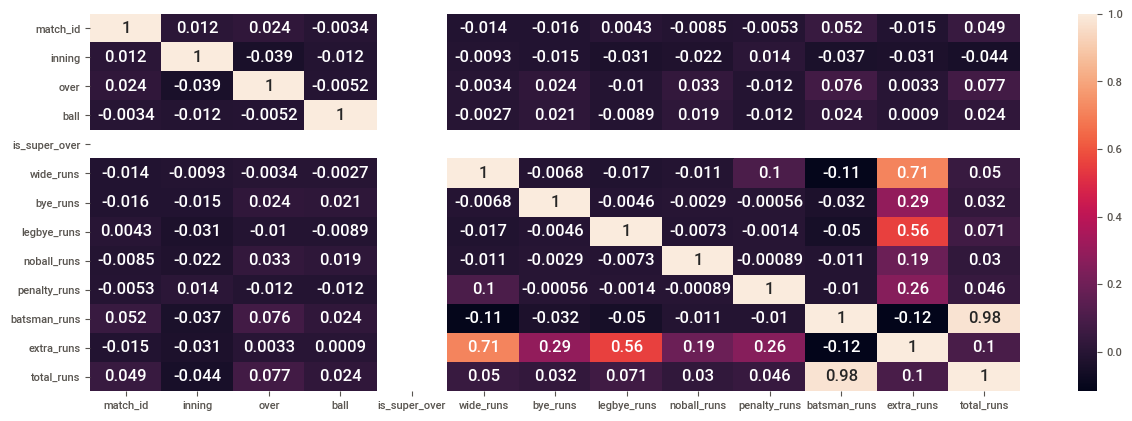

In [71]:
sns.heatmap(Delhi_Mumbai.corr(),yticklabels=True,annot=True)

In [67]:
Delhi_Mumbai.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,5775.000000,5775.000000,5775.000000,5775.000000,5775.0,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000
mean,1896.830649,1.483290,10.217489,3.625455,0.0,0.039307,0.004502,0.021818,0.004848,0.000866,1.237576,0.071342,1.308918
std,3556.433471,0.499764,5.674657,1.815763,0.0,0.249029,0.105185,0.200989,0.071918,0.065795,1.614257,0.351307,1.611296
min,24.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,1.000000,5.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,390.000000,1.000000,10.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,593.000000,2.000000,15.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11325.000000,2.000000,20.000000,9.000000,0.0,5.000000,4.000000,4.000000,2.000000,5.000000,7.000000,7.000000,8.000000


In [68]:
Delhi_Mumbai

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Capitals,1,1,PA Patel,JC Buttler,K Rabada,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Capitals,1,2,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Capitals,1,4,PA Patel,JC Buttler,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Capitals,1,5,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173000,11325,2,Delhi Capitals,Mumbai Indians,20,2,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
173001,11325,2,Delhi Capitals,Mumbai Indians,20,3,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
173002,11325,2,Delhi Capitals,Mumbai Indians,20,4,K Rabada,A Mishra,HH Pandya,0,...,0,0,0,0,0,0,0,K Rabada,caught,KA Pollard
173003,11325,2,Delhi Capitals,Mumbai Indians,20,5,A Mishra,I Sharma,HH Pandya,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# How many Runs ll Both Team score in the total?

In [69]:
Delhi_Mumbai['total_runs'].sum()

7559

In [70]:
len(Delhi_Mumbai['match_id'].value_counts())

24

In [72]:
print("Average Runs Scored by Both teams in a single match:",7559//24)

Average Runs Scored by Both teams in a single match: 314


# How many No balls ll be bowled in the match?

In [73]:
Delhi_Mumbai['noball_runs'].value_counts()

0    5748
1      26
2       1
Name: noball_runs, dtype: int64

In [74]:
print("Average no balls bowled by both teams in a single match",27//24)

Average no balls bowled by both teams in a single match 1


# How many Runs ll Hardik Pandya score in this match?

In [75]:
Hardik_Pandya=Delhi_Mumbai1.loc[(Delhi_Mumbai1['batsman']=='HH Pandya')]

In [77]:
len(Hardik_Pandya['match_id'].value_counts())

9

In [78]:
Hardik_Pandya['batsman_runs'].sum()

123

In [79]:
print("Average Runs scored by Hardik Pandya in a single match",123//9)

Average Runs scored by Hardik Pandya in a single match 13


# How many wickets ll Kagiso Rabada take in this match?

In [80]:
Kagiso_Rabada_wicket=Delhi_Mumbai1.loc[(Delhi_Mumbai1['bowler']=='K Rabada')]

In [81]:
len(Kagiso_Rabada_wicket['match_id'].value_counts())

4

In [82]:
Kagiso_Rabada_wicket['dismissal_kind'].value_counts()

caught     5
run out    1
bowled     1
Name: dismissal_kind, dtype: int64

In [85]:
print("Average Wickets taken by Kagiso Rabada in a single match",6//4)

Average Wickets taken by Kagiso Rabada in a single match 1
